In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# 1. Load dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# 2. Pra-pemrosesan
# Normalisasi piksel (0-255 -> 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Reshaping untuk CNN (tambah dimensi channel: grayscale -> 1 channel)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
# (Opsional) Jika ingin split train menjadi train dan validation (misalnya 80-20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

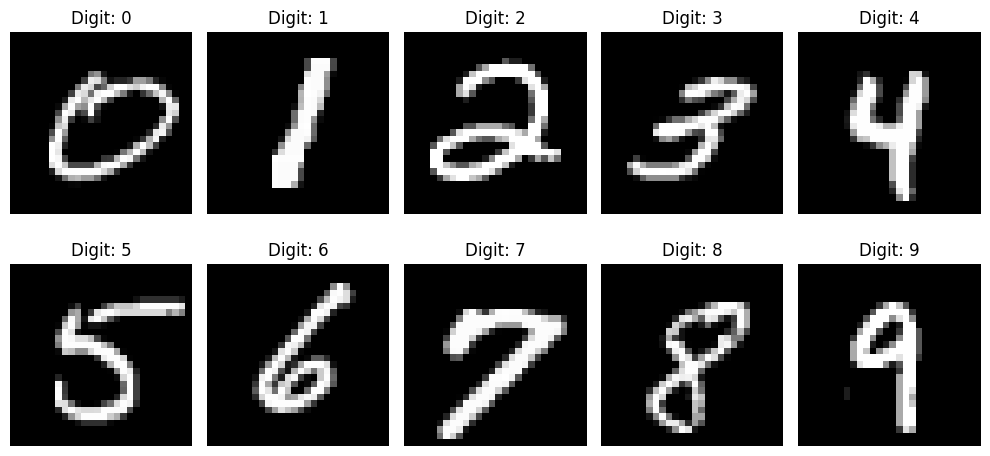

In [ ]:
# 3. Visualisasi satu contoh citra untuk setiap digit 0-9
fig, axes = plt.subplots(2, 5, figsize=(10, 5))  # Grid 2x5 untuk 10 digit
axes = axes.flatten()  # Flatten untuk akses mudah

for digit in range(10):
    # Cari indeks pertama di mana label == digit
    idx = np.where(y_train == digit)[0][0]  # Ambil yang pertama
    ax = axes[digit]
    ax.imshow(x_train[idx].reshape(28, 28), cmap='gray')  # Reshape kembali untuk visualisasi
    ax.set_title(f"Digit: {digit}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Cetak informasi dataset
print(f"Training data shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Validation data shape: {x_val.shape}, Labels: {y_val.shape}")
print(f"Test data shape: {x_test.shape}, Labels: {y_test.shape}")

Training data shape: (48000, 28, 28, 1), Labels: (48000,)
Validation data shape: (12000, 28, 28, 1), Labels: (12000,)
Test data shape: (10000, 28, 28, 1), Labels: (10000,)


In [ ]:
# One-hot encode labels (karena output softmax)
y_train_cat = to_categorical(y_train, 10)
y_val_cat = to_categorical(y_val, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
# 1. Rancang model CNN dari nol
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Lapisan Conv2D pertama
    MaxPooling2D((2, 2)),  # MaxPooling pertama
    Conv2D(64, (3, 3), activation='relu'),  # Lapisan Conv2D kedua
    MaxPooling2D((2, 2)),  # MaxPooling kedua
    Flatten(),  # Flatten untuk mengubah ke 1D
    Dense(128, activation='relu'),  # Dense layer pertama
    Dense(10, activation='softmax')  # Output layer (10 kelas, softmax)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Tampilkan ringkasan model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 2. Latih model
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=32, validation_data=(x_val, y_val_cat))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.9008 - loss: 0.3306 - val_accuracy: 0.9815 - val_loss: 0.0603
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.9864 - loss: 0.0450 - val_accuracy: 0.9888 - val_loss: 0.0372
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9911 - loss: 0.0275 - val_accuracy: 0.9818 - val_loss: 0.0596
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9931 - loss: 0.0219 - val_accuracy: 0.9908 - val_loss: 0.0329
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9952 - loss: 0.0157 - val_accuracy: 0.9892 - val_loss: 0.0450
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9959 - loss: 0.0121 - val_accuracy: 0.9891 - val_loss: 0.0385
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9974 - loss: 0.0077 - val_accuracy: 0.9902 - val_loss: 0.0415
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 32ms/step - accuracy: 0.9976 -

In [ ]:
# 3. Plot training history
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

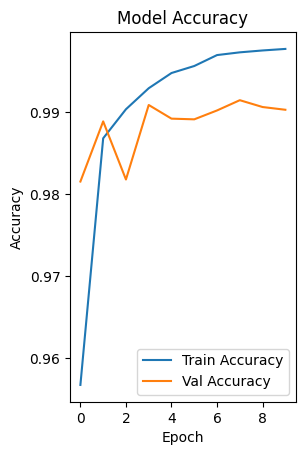

In [ ]:
# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

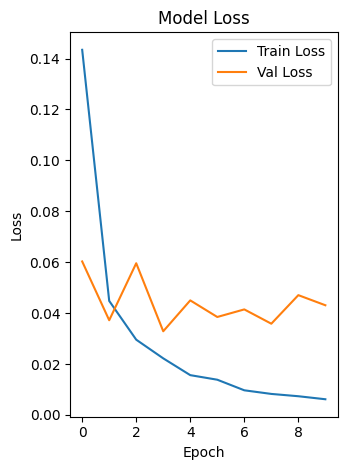

In [ ]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Evaluasi pada test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9889 - loss: 0.0439
Test Accuracy: 0.9915
